In [6]:
import csv
import numpy as np
import numpy.matlib
import pandas as pd
import scipy.sparse.linalg as ll
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing


In [4]:
# load wine dataset
path = 'wine.csv'

data = pd.read_csv(path,header=None).to_numpy()
y = data[:,0]
data = data[:,1:]

ndata = preprocessing.scale(data)
m, n = ndata.shape
C = np.matmul(ndata.T, ndata)/m

In [5]:
# pca the data
d = 2
S,V = ll.eigs(C,k = 2)

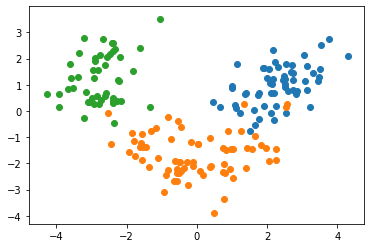

In [7]:
# project the data to the top 2 principal directions
pdata = np.dot(ndata,-V.real)
plt.scatter(pdata[np.where(y == 1),0],pdata[np.where(y == 1),1])
plt.scatter(pdata[np.where(y == 2),0],pdata[np.where(y == 2),1])
plt.scatter(pdata[np.where(y == 3),0],pdata[np.where(y == 3),1])
#plt.show()

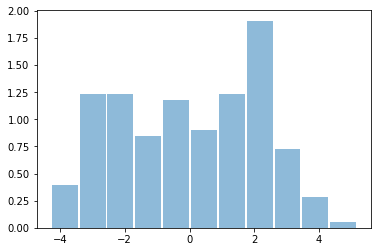

In [8]:
# histogram for first dimension of pdata
# find the range of the data
min_data = min(pdata[:,0])
max_data = max(pdata[:,0])
nbin = 10     # you can change the number of bins in each dimension
sbin = (max_data - min_data) / nbin
#create the bins
boundary = np.arange(min_data-0.001, max_data,sbin)
# just loop over the data points, and count how many of data points are in each bin
myhist = np.zeros(nbin+1)
for i in range (m):
    whichbin = np.max(np.where(pdata[i,0] > boundary))
    myhist[whichbin] = myhist[whichbin] + 1

myhist = np.divide(np.dot(myhist, nbin), m)
# bar chart
plt.figure()
plt.bar(boundary+0.5 * sbin, myhist, align='center', alpha=0.5)
plt.show()

/home/hadi/anaconda3/envs/StatisticalLearning/lib/python3.7/site-packages/mpl_toolkits/mplot3d/axes3d.py:1773: RuntimeWarning: divide by zero encountered in true_divide
  shade = ((normals / np.linalg.norm(normals, axis=1, keepdims=True))


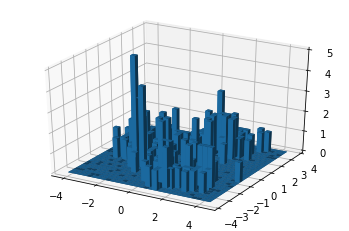

In [9]:
# for 2 dimensional data
min_data = pdata.min(0)
max_data = pdata.max(0)
nbin = 30        # you can change the number of bins in each dimension
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(pdata[:,0], pdata[:,1], bins=nbin)
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])
xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)
dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz )

In [10]:
#kernel density estimator
# create an evaluation grid
gridno = 40
inc1 = (max_data[0]-min_data[0])/gridno
inc2 = (max_data[1]-min_data[1])/gridno
gridx, gridy = np.meshgrid( np.arange(min_data[0], max_data[0]+inc1,inc1), np.arange(min_data[1], max_data[1]+inc2,inc2) )
gridall = [gridx.flatten(order = 'F'), gridy.flatten(order = 'F')]
gridall = (np.asarray(gridall)).T
gridallno, nn= gridall.shape
norm_pdata = (np.power(pdata, 2)).sum(axis=1)
norm_gridall = (np.power(gridall, 2)).sum(axis=1)
cross = np.dot(pdata,gridall.T)

In [11]:
# compute squared distance between each data point and the grid point;
#dist2 = np.matlib.repmat(norm_pdata, 1, gridallno)
dist2 = np.repeat(norm_pdata, repeats =gridallno).reshape((len(norm_pdata), gridallno))+np.tile(norm_gridall, m).reshape((len(norm_pdata), gridallno)) - 2* cross
#choose kernel bandwidth 1; please also experiment with other bandwidth;
bandwidth = 1
#evaluate the kernel function value for each training data point and grid
kernelvalue = np.exp(-dist2)

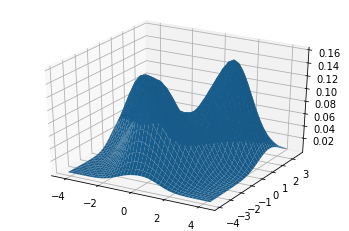

In [12]:
#sum over the training data point to the density value on the grid points;
# here I dropped the normalization factor in front of the kernel function,
# and you can add it back. It is just a constant scaling;
mkde = sum(kernelvalue) / m
#reshape back to grid;
mkde = ((mkde.T).reshape(gridno+1, gridno+1)).T
fig = plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.plot_surface(gridx, gridy, mkde)
plt.show()